# 离群点分析与异常检测

Github地址：https://github.com/ZZZhaojiajing/dataMining_homework

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#5种算法
from pyod.models.knn import KNN
from pyod.models.loda import LODA
from pyod.models.pca import PCA
from pyod.models.cof import COF
from pyod.models.hbos import HBOS

from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

我分别使用KNN、LODA、PCA、COF、HBOS这5种算法进行离群点分析与异常检测，使用的数据集为wine和abalone

观察数据集可发现，前三列point.id、motherset、origin为字符型数据且值大量冗余，直接选择剔除，列ground.truth表示该样本是否为异常点，我将该列的值做字符到数值的映射：nominal：0，anomaly：1(0: inliers, 1: outliers)

我将数据集的所有benchmark除去上述四列的所有公共列的属性值作为x,列ground.truth的数值型数据作为y,借助pyod工具进行无监督训练（训练时只用到x,y在评估算法性能时用到）

# wine数据集异常点检测

In [85]:
def OutlierDetection_wine(filename,algorithm,contamination = 0.1,n_train = 200,n_test = 100,visual=False):
    data=pd.read_csv(filename,usecols = [3,4,5,6,7,8,9,10,11,12,13,14,15,16])#读取选定列
    class_mapping = {'nominal': 0, 'anomaly': 1}
    data['ground.truth']=data['ground.truth'].map(class_mapping)
    
    y = data['ground.truth']  
    x = data.drop('ground.truth',axis=1)
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
    
    # Generate sample data
    X_train, X_test, y_train, y_test = generate_data(n_train=n_train, #n_train : number of training points
                      n_test=n_test, #n_test: number of testing points
                      n_features=2,
                      contamination=contamination, #contamination :percentage of outliers
                      random_state=42)
    if algorithm=='KNN':
        clf_name = 'KNN'
        clf = KNN()
        clf.fit(X_train)
        
    elif algorithm=='LODA':
        clf_name = 'LODA'
        clf = LODA()
        clf.fit(X_train)
        
    elif algorithm=='PCA':
        clf_name = 'PCA'
        clf = PCA()
        clf.fit(X_train)
        
    elif algorithm=='COF':
        clf_name = 'COF'
        clf = COF()
        clf.fit(X_train)
    
    elif algorithm=='HBOS':
        clf_name = 'HBOS'
        clf = HBOS()
        clf.fit(X_train)
    
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
    
    # evaluate and print the results
    eval_train=evaluate_print(clf_name, y_train, y_train_scores)
    eval_test=evaluate_print(clf_name, y_test, y_test_scores)
   
    if visual:
        visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
                  y_test_pred, show_figure=True, save_figure=False)
    return eval_train,eval_test

In [5]:
path_wine="H:\\dataset_DM\\wine\\benchmarks\\"
file_directory_wine=os.listdir(path_wine)
models=['KNN','LODA','PCA','COF','HBOS']

Training in KNN For Outlier Detection:


wine_benchmark_0001.csv has begun!! wine_benchmark_0002.csv has begun!! wine_benchmark_0003.csv has begun!! wine_benchmark_0004.csv has begun!! wine_benchmark_0005.csv has begun!! wine_benchmark_0006.csv has begun!! wine_benchmark_0007.csv has begun!! wine_benchmark_0008.csv has begun!! wine_benchmark_0009.csv has begun!! wine_benchmark_0010.csv has begun!! wine_benchmark_0011.csv has begun!! wine_benchmark_0012.csv has begun!! wine_benchmark_0013.csv has begun!! wine_benchmark_0014.csv has begun!! wine_benchmark_0015.csv has begun!! wine_benchmark_0016.csv has begun!! wine_benchmark_0017.csv has begun!! wine_benchmark_0018.csv has begun!! wine_benchmark_0019.csv has begun!! wine_benchmark_0020.csv has begun!! wine_benchmark_0021.csv has begun!! wine_benchmark_0022.csv has begun!! wine_benchmark_0023.csv has begun!! wine_benchmark_0024.csv has begun!! wine_benchmark_0025.csv has begun!! wine_benchmark_0026.csv has begun!! wine_benchmark_0027.csv has begun!! wine_benchmark_0028.csv has 

wine_benchmark_1274.csv has begun!! wine_benchmark_1275.csv has begun!! wine_benchmark_1276.csv has begun!! wine_benchmark_1277.csv has begun!! wine_benchmark_1278.csv has begun!! wine_benchmark_1279.csv has begun!! wine_benchmark_1280.csv has begun!! wine_benchmark_1281.csv has begun!! wine_benchmark_1282.csv has begun!! wine_benchmark_1283.csv has begun!! wine_benchmark_1284.csv has begun!! wine_benchmark_1285.csv has begun!! wine_benchmark_1286.csv has begun!! wine_benchmark_1287.csv has begun!! wine_benchmark_1288.csv has begun!! wine_benchmark_1289.csv has begun!! wine_benchmark_1290.csv has begun!! wine_benchmark_1291.csv has begun!! wine_benchmark_1292.csv has begun!! wine_benchmark_1293.csv has begun!! wine_benchmark_1294.csv has begun!! wine_benchmark_1295.csv has begun!! wine_benchmark_1296.csv has begun!! wine_benchmark_1297.csv has begun!! wine_benchmark_1298.csv has begun!! wine_benchmark_1299.csv has begun!! wine_benchmark_1300.csv has begun!! wine_benchmark_1301.csv has 

wine_benchmark_1626.csv has begun!! wine_benchmark_1627.csv has begun!! wine_benchmark_1628.csv has begun!! wine_benchmark_1629.csv has begun!! wine_benchmark_1630.csv has begun!! wine_benchmark_1631.csv has begun!! wine_benchmark_1632.csv has begun!! wine_benchmark_1633.csv has begun!! wine_benchmark_1634.csv has begun!! wine_benchmark_1635.csv has begun!! wine_benchmark_1636.csv has begun!! wine_benchmark_1637.csv has begun!! wine_benchmark_1638.csv has begun!! wine_benchmark_1639.csv has begun!! wine_benchmark_1640.csv has begun!! wine_benchmark_1641.csv has begun!! wine_benchmark_1642.csv has begun!! wine_benchmark_1643.csv has begun!! wine_benchmark_1644.csv has begun!! wine_benchmark_1645.csv has begun!! wine_benchmark_1646.csv has begun!! wine_benchmark_1647.csv has begun!! wine_benchmark_1648.csv has begun!! wine_benchmark_1649.csv has begun!! wine_benchmark_1650.csv has begun!! wine_benchmark_1651.csv has begun!! wine_benchmark_1652.csv has begun!! wine_benchmark_1653.csv has 

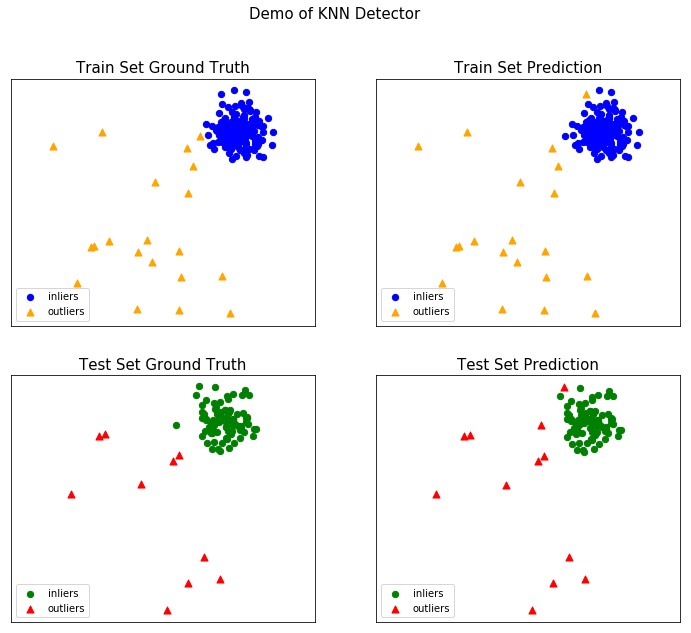

For KNN Algorithm:

On Training Data:
Average ROC:0.9992, Average precision @ rank n:0.95

On Test Data:
Average ROC:1.0, Average precision @ rank n:1.0


Training in LODA For Outlier Detection:


wine_benchmark_0001.csv has begun!! wine_benchmark_0002.csv has begun!! wine_benchmark_0003.csv has begun!! wine_benchmark_0004.csv has begun!! wine_benchmark_0005.csv has begun!! wine_benchmark_0006.csv has begun!! wine_benchmark_0007.csv has begun!! wine_benchmark_0008.csv has begun!! wine_benchmark_0009.csv has begun!! wine_benchmark_0010.csv has begun!! wine_benchmark_0011.csv has begun!! wine_benchmark_0012.csv has begun!! wine_benchmark_0013.csv has begun!! wine_benchmark_0014.csv has begun!! wine_benchmark_0015.csv has begun!! wine_benchmark_0016.csv has begun!! wine_benchmark_0017.csv has begun!! wine_benchmark_0018.csv has begun!! wine_benchmark_0019.csv has begun!! wine_benchmark_0020.csv has begun!! wine_benchmark_0021.csv has begun!! wine_benchmark_0022.csv has begun!! wine_benchmark_0023.csv has begun!! wine_benchmark_0024.csv has begun!! wine_benchmark_0025.csv has begun!! wine_benchmark_0026.csv has begun!! wine_benchmark_0027.csv has begun!! wine_benchmark_0028.csv has 

wine_benchmark_1268.csv has begun!! wine_benchmark_1269.csv has begun!! wine_benchmark_1270.csv has begun!! wine_benchmark_1271.csv has begun!! wine_benchmark_1272.csv has begun!! wine_benchmark_1273.csv has begun!! wine_benchmark_1274.csv has begun!! wine_benchmark_1275.csv has begun!! wine_benchmark_1276.csv has begun!! wine_benchmark_1277.csv has begun!! wine_benchmark_1278.csv has begun!! wine_benchmark_1279.csv has begun!! wine_benchmark_1280.csv has begun!! wine_benchmark_1281.csv has begun!! wine_benchmark_1282.csv has begun!! wine_benchmark_1283.csv has begun!! wine_benchmark_1284.csv has begun!! wine_benchmark_1285.csv has begun!! wine_benchmark_1286.csv has begun!! wine_benchmark_1287.csv has begun!! wine_benchmark_1288.csv has begun!! wine_benchmark_1289.csv has begun!! wine_benchmark_1290.csv has begun!! wine_benchmark_1291.csv has begun!! wine_benchmark_1292.csv has begun!! wine_benchmark_1293.csv has begun!! wine_benchmark_1294.csv has begun!! wine_benchmark_1295.csv has 

wine_benchmark_1618.csv has begun!! wine_benchmark_1619.csv has begun!! wine_benchmark_1620.csv has begun!! wine_benchmark_1621.csv has begun!! wine_benchmark_1622.csv has begun!! wine_benchmark_1623.csv has begun!! wine_benchmark_1624.csv has begun!! wine_benchmark_1625.csv has begun!! wine_benchmark_1626.csv has begun!! wine_benchmark_1627.csv has begun!! wine_benchmark_1628.csv has begun!! wine_benchmark_1629.csv has begun!! wine_benchmark_1630.csv has begun!! wine_benchmark_1631.csv has begun!! wine_benchmark_1632.csv has begun!! wine_benchmark_1633.csv has begun!! wine_benchmark_1634.csv has begun!! wine_benchmark_1635.csv has begun!! wine_benchmark_1636.csv has begun!! wine_benchmark_1637.csv has begun!! wine_benchmark_1638.csv has begun!! wine_benchmark_1639.csv has begun!! wine_benchmark_1640.csv has begun!! wine_benchmark_1641.csv has begun!! wine_benchmark_1642.csv has begun!! wine_benchmark_1643.csv has begun!! wine_benchmark_1644.csv has begun!! wine_benchmark_1645.csv has 

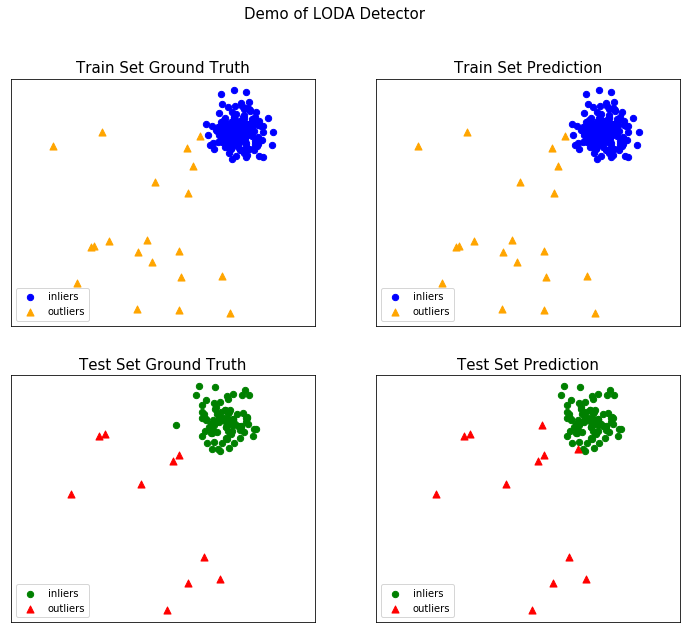

For LODA Algorithm:

On Training Data:
Average ROC:0.9999, Average precision @ rank n:0.9996

On Test Data:
Average ROC:0.9994, Average precision @ rank n:0.9665


Training in PCA For Outlier Detection:


wine_benchmark_0001.csv has begun!! wine_benchmark_0002.csv has begun!! wine_benchmark_0003.csv has begun!! wine_benchmark_0004.csv has begun!! wine_benchmark_0005.csv has begun!! wine_benchmark_0006.csv has begun!! wine_benchmark_0007.csv has begun!! wine_benchmark_0008.csv has begun!! wine_benchmark_0009.csv has begun!! wine_benchmark_0010.csv has begun!! wine_benchmark_0011.csv has begun!! wine_benchmark_0012.csv has begun!! wine_benchmark_0013.csv has begun!! wine_benchmark_0014.csv has begun!! wine_benchmark_0015.csv has begun!! wine_benchmark_0016.csv has begun!! wine_benchmark_0017.csv has begun!! wine_benchmark_0018.csv has begun!! wine_benchmark_0019.csv has begun!! wine_benchmark_0020.csv has begun!! wine_benchmark_0021.csv has begun!! wine_benchmark_0022.csv has begun!! wine_benchmark_0023.csv has begun!! wine_benchmark_0024.csv has begun!! wine_benchmark_0025.csv has begun!! wine_benchmark_0026.csv has begun!! wine_benchmark_0027.csv has begun!! wine_benchmark_0028.csv has 

wine_benchmark_1277.csv has begun!! wine_benchmark_1278.csv has begun!! wine_benchmark_1279.csv has begun!! wine_benchmark_1280.csv has begun!! wine_benchmark_1281.csv has begun!! wine_benchmark_1282.csv has begun!! wine_benchmark_1283.csv has begun!! wine_benchmark_1284.csv has begun!! wine_benchmark_1285.csv has begun!! wine_benchmark_1286.csv has begun!! wine_benchmark_1287.csv has begun!! wine_benchmark_1288.csv has begun!! wine_benchmark_1289.csv has begun!! wine_benchmark_1290.csv has begun!! wine_benchmark_1291.csv has begun!! wine_benchmark_1292.csv has begun!! wine_benchmark_1293.csv has begun!! wine_benchmark_1294.csv has begun!! wine_benchmark_1295.csv has begun!! wine_benchmark_1296.csv has begun!! wine_benchmark_1297.csv has begun!! wine_benchmark_1298.csv has begun!! wine_benchmark_1299.csv has begun!! wine_benchmark_1300.csv has begun!! wine_benchmark_1301.csv has begun!! wine_benchmark_1302.csv has begun!! wine_benchmark_1303.csv has begun!! wine_benchmark_1304.csv has 

wine_benchmark_1625.csv has begun!! wine_benchmark_1626.csv has begun!! wine_benchmark_1627.csv has begun!! wine_benchmark_1628.csv has begun!! wine_benchmark_1629.csv has begun!! wine_benchmark_1630.csv has begun!! wine_benchmark_1631.csv has begun!! wine_benchmark_1632.csv has begun!! wine_benchmark_1633.csv has begun!! wine_benchmark_1634.csv has begun!! wine_benchmark_1635.csv has begun!! wine_benchmark_1636.csv has begun!! wine_benchmark_1637.csv has begun!! wine_benchmark_1638.csv has begun!! wine_benchmark_1639.csv has begun!! wine_benchmark_1640.csv has begun!! wine_benchmark_1641.csv has begun!! wine_benchmark_1642.csv has begun!! wine_benchmark_1643.csv has begun!! wine_benchmark_1644.csv has begun!! wine_benchmark_1645.csv has begun!! wine_benchmark_1646.csv has begun!! wine_benchmark_1647.csv has begun!! wine_benchmark_1648.csv has begun!! wine_benchmark_1649.csv has begun!! wine_benchmark_1650.csv has begun!! wine_benchmark_1651.csv has begun!! wine_benchmark_1652.csv has 

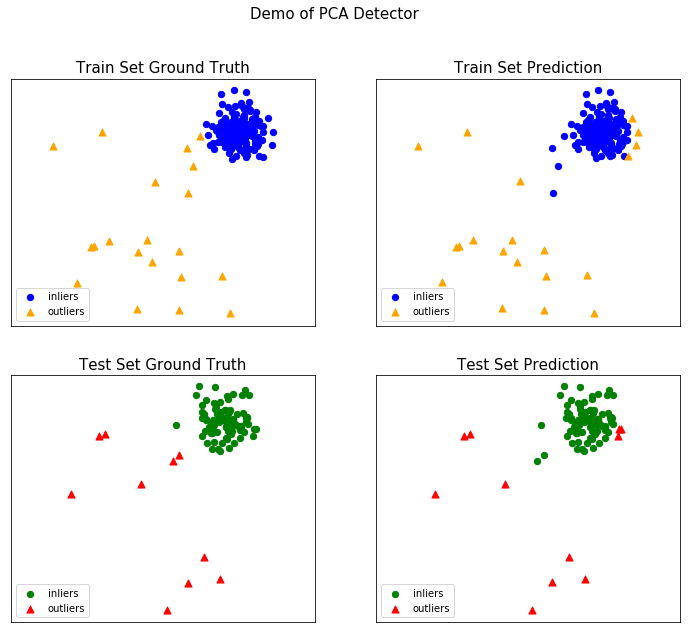

For PCA Algorithm:

On Training Data:
Average ROC:0.8964, Average precision @ rank n:0.8

On Test Data:
Average ROC:0.9033, Average precision @ rank n:0.8


Training in COF For Outlier Detection:


wine_benchmark_0001.csv has begun!! wine_benchmark_0002.csv has begun!! wine_benchmark_0003.csv has begun!! wine_benchmark_0004.csv has begun!! wine_benchmark_0005.csv has begun!! wine_benchmark_0006.csv has begun!! wine_benchmark_0007.csv has begun!! wine_benchmark_0008.csv has begun!! wine_benchmark_0009.csv has begun!! wine_benchmark_0010.csv has begun!! wine_benchmark_0011.csv has begun!! wine_benchmark_0012.csv has begun!! wine_benchmark_0013.csv has begun!! wine_benchmark_0014.csv has begun!! wine_benchmark_0015.csv has begun!! wine_benchmark_0016.csv has begun!! wine_benchmark_0017.csv has begun!! wine_benchmark_0018.csv has begun!! wine_benchmark_0019.csv has begun!! wine_benchmark_0020.csv has begun!! wine_benchmark_0021.csv has begun!! wine_benchmark_0022.csv has begun!! wine_benchmark_0023.csv has begun!! wine_benchmark_0024.csv has begun!! wine_benchmark_0025.csv has begun!! wine_benchmark_0026.csv has begun!! wine_benchmark_0027.csv has begun!! wine_benchmark_0028.csv has 

wine_benchmark_1263.csv has begun!! wine_benchmark_1264.csv has begun!! wine_benchmark_1265.csv has begun!! wine_benchmark_1266.csv has begun!! wine_benchmark_1267.csv has begun!! wine_benchmark_1268.csv has begun!! wine_benchmark_1269.csv has begun!! wine_benchmark_1270.csv has begun!! wine_benchmark_1271.csv has begun!! wine_benchmark_1272.csv has begun!! wine_benchmark_1273.csv has begun!! wine_benchmark_1274.csv has begun!! wine_benchmark_1275.csv has begun!! wine_benchmark_1276.csv has begun!! wine_benchmark_1277.csv has begun!! wine_benchmark_1278.csv has begun!! wine_benchmark_1279.csv has begun!! wine_benchmark_1280.csv has begun!! wine_benchmark_1281.csv has begun!! wine_benchmark_1282.csv has begun!! wine_benchmark_1283.csv has begun!! wine_benchmark_1284.csv has begun!! wine_benchmark_1285.csv has begun!! wine_benchmark_1286.csv has begun!! wine_benchmark_1287.csv has begun!! wine_benchmark_1288.csv has begun!! wine_benchmark_1289.csv has begun!! wine_benchmark_1290.csv has 

wine_benchmark_1611.csv has begun!! wine_benchmark_1612.csv has begun!! wine_benchmark_1613.csv has begun!! wine_benchmark_1614.csv has begun!! wine_benchmark_1615.csv has begun!! wine_benchmark_1616.csv has begun!! wine_benchmark_1617.csv has begun!! wine_benchmark_1618.csv has begun!! wine_benchmark_1619.csv has begun!! wine_benchmark_1620.csv has begun!! wine_benchmark_1621.csv has begun!! wine_benchmark_1622.csv has begun!! wine_benchmark_1623.csv has begun!! wine_benchmark_1624.csv has begun!! wine_benchmark_1625.csv has begun!! wine_benchmark_1626.csv has begun!! wine_benchmark_1627.csv has begun!! wine_benchmark_1628.csv has begun!! wine_benchmark_1629.csv has begun!! wine_benchmark_1630.csv has begun!! wine_benchmark_1631.csv has begun!! wine_benchmark_1632.csv has begun!! wine_benchmark_1633.csv has begun!! wine_benchmark_1634.csv has begun!! wine_benchmark_1635.csv has begun!! wine_benchmark_1636.csv has begun!! wine_benchmark_1637.csv has begun!! wine_benchmark_1638.csv has 

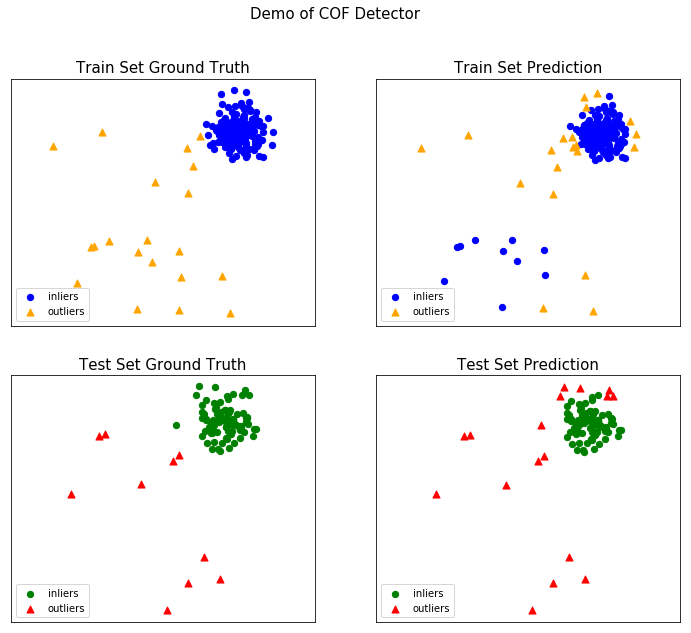

For COF Algorithm:

On Training Data:
Average ROC:0.9281, Average precision @ rank n:0.5

On Test Data:
Average ROC:1.0, Average precision @ rank n:1.0


Training in HBOS For Outlier Detection:


wine_benchmark_0001.csv has begun!! wine_benchmark_0002.csv has begun!! wine_benchmark_0003.csv has begun!! wine_benchmark_0004.csv has begun!! wine_benchmark_0005.csv has begun!! wine_benchmark_0006.csv has begun!! wine_benchmark_0007.csv has begun!! wine_benchmark_0008.csv has begun!! wine_benchmark_0009.csv has begun!! wine_benchmark_0010.csv has begun!! wine_benchmark_0011.csv has begun!! wine_benchmark_0012.csv has begun!! wine_benchmark_0013.csv has begun!! wine_benchmark_0014.csv has begun!! wine_benchmark_0015.csv has begun!! wine_benchmark_0016.csv has begun!! wine_benchmark_0017.csv has begun!! wine_benchmark_0018.csv has begun!! wine_benchmark_0019.csv has begun!! wine_benchmark_0020.csv has begun!! wine_benchmark_0021.csv has begun!! wine_benchmark_0022.csv has begun!! wine_benchmark_0023.csv has begun!! wine_benchmark_0024.csv has begun!! wine_benchmark_0025.csv has begun!! wine_benchmark_0026.csv has begun!! wine_benchmark_0027.csv has begun!! wine_benchmark_0028.csv has 

wine_benchmark_1270.csv has begun!! wine_benchmark_1271.csv has begun!! wine_benchmark_1272.csv has begun!! wine_benchmark_1273.csv has begun!! wine_benchmark_1274.csv has begun!! wine_benchmark_1275.csv has begun!! wine_benchmark_1276.csv has begun!! wine_benchmark_1277.csv has begun!! wine_benchmark_1278.csv has begun!! wine_benchmark_1279.csv has begun!! wine_benchmark_1280.csv has begun!! wine_benchmark_1281.csv has begun!! wine_benchmark_1282.csv has begun!! wine_benchmark_1283.csv has begun!! wine_benchmark_1284.csv has begun!! wine_benchmark_1285.csv has begun!! wine_benchmark_1286.csv has begun!! wine_benchmark_1287.csv has begun!! wine_benchmark_1288.csv has begun!! wine_benchmark_1289.csv has begun!! wine_benchmark_1290.csv has begun!! wine_benchmark_1291.csv has begun!! wine_benchmark_1292.csv has begun!! wine_benchmark_1293.csv has begun!! wine_benchmark_1294.csv has begun!! wine_benchmark_1295.csv has begun!! wine_benchmark_1296.csv has begun!! wine_benchmark_1297.csv has 

wine_benchmark_1619.csv has begun!! wine_benchmark_1620.csv has begun!! wine_benchmark_1621.csv has begun!! wine_benchmark_1622.csv has begun!! wine_benchmark_1623.csv has begun!! wine_benchmark_1624.csv has begun!! wine_benchmark_1625.csv has begun!! wine_benchmark_1626.csv has begun!! wine_benchmark_1627.csv has begun!! wine_benchmark_1628.csv has begun!! wine_benchmark_1629.csv has begun!! wine_benchmark_1630.csv has begun!! wine_benchmark_1631.csv has begun!! wine_benchmark_1632.csv has begun!! wine_benchmark_1633.csv has begun!! wine_benchmark_1634.csv has begun!! wine_benchmark_1635.csv has begun!! wine_benchmark_1636.csv has begun!! wine_benchmark_1637.csv has begun!! wine_benchmark_1638.csv has begun!! wine_benchmark_1639.csv has begun!! wine_benchmark_1640.csv has begun!! wine_benchmark_1641.csv has begun!! wine_benchmark_1642.csv has begun!! wine_benchmark_1643.csv has begun!! wine_benchmark_1644.csv has begun!! wine_benchmark_1645.csv has begun!! wine_benchmark_1646.csv has 

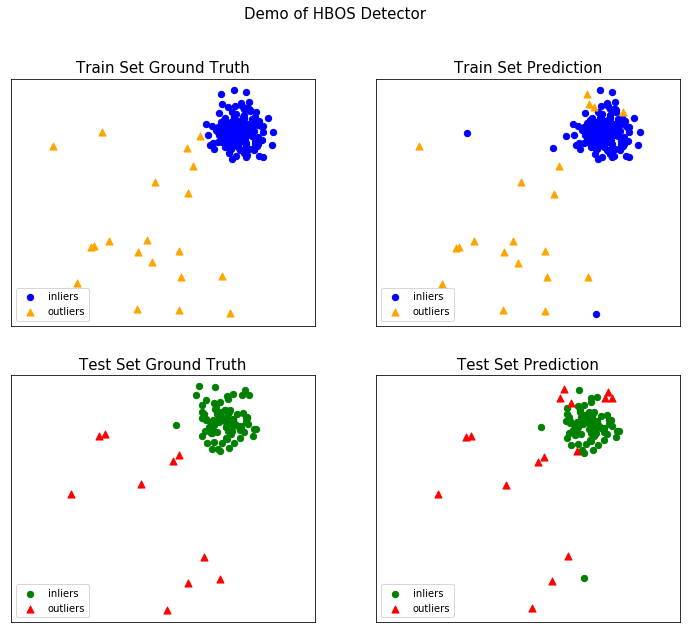

For HBOS Algorithm:

On Training Data:
Average ROC:0.9947, Average precision @ rank n:0.8

On Test Data:
Average ROC:0.9744, Average precision @ rank n:0.6




In [89]:
for algorithm in models:
    print('Training in '+algorithm+' For Outlier Detection:')
    roc_train=[]
    prn_train=[]
    roc_test=[]
    prn_test=[]
    for file in file_directory_wine:
        print(file+' has begun!! ',end='')
        if file=='wine_benchmark_1680.csv':
            filename=path_wine+file
            eval_train,eval_test=OutlierDetection_wine(filename,algorithm,visual=True)
        else:    
            filename=path_wine+file
            eval_train,eval_test=OutlierDetection_wine(filename,algorithm)
      
            
        roc_train.append(eval_train[0])
        prn_train.append(eval_train[1])
        roc_test.append(eval_test[0])
        prn_test.append(eval_test[1])
    
    roc_train=np.array(roc_train)
    prn_train=np.array(prn_train)
    roc_test=np.array(roc_test)
    prn_test=np.array(prn_test)
    
    print('For '+algorithm+' Algorithm:')
    print("\nOn Training Data:")
    print('Average ROC:{:.4}, Average precision @ rank n:{:.4}'.format(roc_train.mean(),prn_train.mean()) )
    print("\nOn Test Data:")
    print('Average ROC:{:.4}, Average precision @ rank n:{:.4}'.format(roc_test.mean(),prn_test.mean()) )
    print('=======================================================================================================')
    print('\n')
       
    

由上述运行结果可知，在wine数据集上，异常点检测指标如下：

对于KNN算法， 在训练集上的 avg ROC=0.9992 , avg prn=0.95;在测试集上的 avg ROC=1.0 , avg prn=1.0。

对于LODA算法，在训练集上的 avg ROC=0.9999 , avg prn=0.9996;在测试集上的 avg ROC=0.9994 , avg prn=0.9665。

对于PCA算法， 在训练集上的 avg ROC=0.8964 , avg prn=0.8;在测试集上的 avg ROC=0.9033 , avg prn=0.8。

对于COF算法， 在训练集上的 avg ROC=0.9281 , avg prn=0.5;在测试集上的 avg ROC=1.0 , avg prn=1.0。

对于HBOS算法，在训练集上的 avg ROC=0.9947 , avg prn=0.8;在测试集上的 avg ROC=0.9744 , avg prn=0.6。

ps:由于数据量过大，仅将wine数据集的最后一个benchmark在不同的算法上对异常点检测的结果进行可视化展示。

# abalone数据集异常点检测

In [7]:
def OutlierDetection_abalone(filename,algorithm,contamination = 0.1,n_train = 400,n_test = 200,visual=False):
    data=pd.read_csv(filename,usecols = [3,4,5,6,7,8,9,10,11,12])#读取选定列
    class_mapping = {'nominal': 0, 'anomaly': 1}
    data['ground.truth']=data['ground.truth'].map(class_mapping)
    
    y = data['ground.truth']  
    x = data.drop('ground.truth',axis=1)
    X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
    
    # Generate sample data
    X_train, X_test, y_train, y_test = generate_data(n_train=n_train, #n_train : number of training points
                      n_test=n_test, #n_test: number of testing points
                      n_features=2,
                      contamination=contamination, #contamination :percentage of outliers
                      random_state=42)
    if algorithm=='KNN':
        clf_name = 'KNN'
        clf = KNN()
        clf.fit(X_train)
        
    elif algorithm=='LODA':
        clf_name = 'LODA'
        clf = LODA()
        clf.fit(X_train)
        
    elif algorithm=='PCA':
        clf_name = 'PCA'
        clf = PCA()
        clf.fit(X_train)
        
    elif algorithm=='COF':
        clf_name = 'COF'
        clf = COF()
        clf.fit(X_train)
    
    elif algorithm=='HBOS':
        clf_name = 'HBOS'
        clf = HBOS()
        clf.fit(X_train)
    
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores
    
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
    
    # evaluate and print the results
    eval_train=evaluate_print(clf_name, y_train, y_train_scores)
    eval_test=evaluate_print(clf_name, y_test, y_test_scores)
   
    if visual:
        visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
                  y_test_pred, show_figure=True, save_figure=False)
    return eval_train,eval_test

In [8]:
path_abalone="H:\\dataset_DM\\abalone\\benchmarks\\"
file_directory_abalone=os.listdir(path_abalone)

Training in KNN For Outlier Detection:


abalone_benchmark_0001.csv has begun!! abalone_benchmark_0002.csv has begun!! abalone_benchmark_0003.csv has begun!! abalone_benchmark_0004.csv has begun!! abalone_benchmark_0005.csv has begun!! abalone_benchmark_0006.csv has begun!! abalone_benchmark_0007.csv has begun!! abalone_benchmark_0008.csv has begun!! abalone_benchmark_0009.csv has begun!! abalone_benchmark_0010.csv has begun!! abalone_benchmark_0011.csv has begun!! abalone_benchmark_0012.csv has begun!! abalone_benchmark_0013.csv has begun!! abalone_benchmark_0014.csv has begun!! abalone_benchmark_0015.csv has begun!! abalone_benchmark_0016.csv has begun!! abalone_benchmark_0017.csv has begun!! abalone_benchmark_0018.csv has begun!! abalone_benchmark_0019.csv has begun!! abalone_benchmark_0020.csv has begun!! abalone_benchmark_0021.csv has begun!! abalone_benchmark_0022.csv has begun!! abalone_benchmark_0023.csv has begun!! abalone_benchmark_0024.csv has begun!! abalone_benchmark_0025.csv has begun!! abalone_benchmark_0026.cs

abalone_benchmark_0705.csv has begun!! abalone_benchmark_0706.csv has begun!! abalone_benchmark_0707.csv has begun!! abalone_benchmark_0708.csv has begun!! abalone_benchmark_0709.csv has begun!! abalone_benchmark_0710.csv has begun!! abalone_benchmark_0711.csv has begun!! abalone_benchmark_0712.csv has begun!! abalone_benchmark_0713.csv has begun!! abalone_benchmark_0714.csv has begun!! abalone_benchmark_0715.csv has begun!! abalone_benchmark_0716.csv has begun!! abalone_benchmark_0717.csv has begun!! abalone_benchmark_0718.csv has begun!! abalone_benchmark_0719.csv has begun!! abalone_benchmark_0720.csv has begun!! abalone_benchmark_0721.csv has begun!! abalone_benchmark_0722.csv has begun!! abalone_benchmark_0723.csv has begun!! abalone_benchmark_0724.csv has begun!! abalone_benchmark_0725.csv has begun!! abalone_benchmark_0731.csv has begun!! abalone_benchmark_0732.csv has begun!! abalone_benchmark_0733.csv has begun!! abalone_benchmark_0734.csv has begun!! abalone_benchmark_0735.cs

abalone_benchmark_0922.csv has begun!! abalone_benchmark_0923.csv has begun!! abalone_benchmark_0924.csv has begun!! abalone_benchmark_0925.csv has begun!! abalone_benchmark_0926.csv has begun!! abalone_benchmark_0927.csv has begun!! abalone_benchmark_0928.csv has begun!! abalone_benchmark_0929.csv has begun!! abalone_benchmark_0930.csv has begun!! abalone_benchmark_0931.csv has begun!! abalone_benchmark_0932.csv has begun!! abalone_benchmark_0933.csv has begun!! abalone_benchmark_0934.csv has begun!! abalone_benchmark_0935.csv has begun!! abalone_benchmark_0936.csv has begun!! abalone_benchmark_0937.csv has begun!! abalone_benchmark_0938.csv has begun!! abalone_benchmark_0939.csv has begun!! abalone_benchmark_0940.csv has begun!! abalone_benchmark_0941.csv has begun!! abalone_benchmark_0942.csv has begun!! abalone_benchmark_0943.csv has begun!! abalone_benchmark_0944.csv has begun!! abalone_benchmark_0945.csv has begun!! abalone_benchmark_0946.csv has begun!! abalone_benchmark_0947.cs

abalone_benchmark_1140.csv has begun!! abalone_benchmark_1141.csv has begun!! abalone_benchmark_1142.csv has begun!! abalone_benchmark_1143.csv has begun!! abalone_benchmark_1144.csv has begun!! abalone_benchmark_1145.csv has begun!! abalone_benchmark_1146.csv has begun!! abalone_benchmark_1147.csv has begun!! abalone_benchmark_1148.csv has begun!! abalone_benchmark_1149.csv has begun!! abalone_benchmark_1150.csv has begun!! abalone_benchmark_1151.csv has begun!! abalone_benchmark_1152.csv has begun!! abalone_benchmark_1153.csv has begun!! abalone_benchmark_1154.csv has begun!! abalone_benchmark_1155.csv has begun!! abalone_benchmark_1156.csv has begun!! abalone_benchmark_1157.csv has begun!! abalone_benchmark_1158.csv has begun!! abalone_benchmark_1159.csv has begun!! abalone_benchmark_1160.csv has begun!! abalone_benchmark_1161.csv has begun!! abalone_benchmark_1162.csv has begun!! abalone_benchmark_1163.csv has begun!! abalone_benchmark_1164.csv has begun!! abalone_benchmark_1165.cs

abalone_benchmark_1352.csv has begun!! abalone_benchmark_1353.csv has begun!! abalone_benchmark_1354.csv has begun!! abalone_benchmark_1355.csv has begun!! abalone_benchmark_1356.csv has begun!! abalone_benchmark_1357.csv has begun!! abalone_benchmark_1358.csv has begun!! abalone_benchmark_1359.csv has begun!! abalone_benchmark_1360.csv has begun!! abalone_benchmark_1361.csv has begun!! abalone_benchmark_1362.csv has begun!! abalone_benchmark_1363.csv has begun!! abalone_benchmark_1364.csv has begun!! abalone_benchmark_1365.csv has begun!! abalone_benchmark_1366.csv has begun!! abalone_benchmark_1367.csv has begun!! abalone_benchmark_1368.csv has begun!! abalone_benchmark_1369.csv has begun!! abalone_benchmark_1370.csv has begun!! abalone_benchmark_1371.csv has begun!! abalone_benchmark_1372.csv has begun!! abalone_benchmark_1373.csv has begun!! abalone_benchmark_1374.csv has begun!! abalone_benchmark_1375.csv has begun!! abalone_benchmark_1376.csv has begun!! abalone_benchmark_1377.cs

abalone_benchmark_1564.csv has begun!! abalone_benchmark_1565.csv has begun!! abalone_benchmark_1566.csv has begun!! abalone_benchmark_1567.csv has begun!! abalone_benchmark_1568.csv has begun!! abalone_benchmark_1569.csv has begun!! abalone_benchmark_1570.csv has begun!! abalone_benchmark_1571.csv has begun!! abalone_benchmark_1572.csv has begun!! abalone_benchmark_1573.csv has begun!! abalone_benchmark_1574.csv has begun!! abalone_benchmark_1575.csv has begun!! abalone_benchmark_1576.csv has begun!! abalone_benchmark_1577.csv has begun!! abalone_benchmark_1578.csv has begun!! abalone_benchmark_1579.csv has begun!! abalone_benchmark_1580.csv has begun!! abalone_benchmark_1581.csv has begun!! abalone_benchmark_1582.csv has begun!! abalone_benchmark_1583.csv has begun!! abalone_benchmark_1584.csv has begun!! abalone_benchmark_1585.csv has begun!! abalone_benchmark_1586.csv has begun!! abalone_benchmark_1587.csv has begun!! abalone_benchmark_1588.csv has begun!! abalone_benchmark_1589.cs

abalone_benchmark_1779.csv has begun!! abalone_benchmark_1780.csv has begun!! abalone_benchmark_1781.csv has begun!! abalone_benchmark_1782.csv has begun!! abalone_benchmark_1783.csv has begun!! abalone_benchmark_1784.csv has begun!! abalone_benchmark_1785.csv has begun!! abalone_benchmark_1786.csv has begun!! abalone_benchmark_1787.csv has begun!! abalone_benchmark_1788.csv has begun!! abalone_benchmark_1789.csv has begun!! abalone_benchmark_1790.csv has begun!! abalone_benchmark_1791.csv has begun!! abalone_benchmark_1792.csv has begun!! abalone_benchmark_1793.csv has begun!! abalone_benchmark_1794.csv has begun!! abalone_benchmark_1795.csv has begun!! abalone_benchmark_1796.csv has begun!! abalone_benchmark_1797.csv has begun!! abalone_benchmark_1798.csv has begun!! abalone_benchmark_1799.csv has begun!! abalone_benchmark_1800.csv has begun!! 

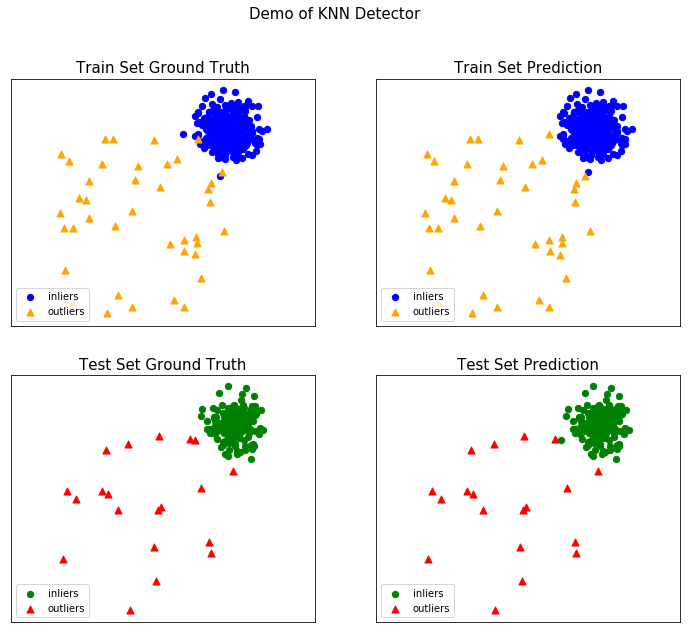

For KNN Algorithm:

On Training Data:
Average ROC:0.9952, Average precision @ rank n:0.95

On Test Data:
Average ROC:1.0, Average precision @ rank n:1.0


Training in LODA For Outlier Detection:


abalone_benchmark_0001.csv has begun!! abalone_benchmark_0002.csv has begun!! abalone_benchmark_0003.csv has begun!! abalone_benchmark_0004.csv has begun!! abalone_benchmark_0005.csv has begun!! abalone_benchmark_0006.csv has begun!! abalone_benchmark_0007.csv has begun!! abalone_benchmark_0008.csv has begun!! abalone_benchmark_0009.csv has begun!! abalone_benchmark_0010.csv has begun!! abalone_benchmark_0011.csv has begun!! abalone_benchmark_0012.csv has begun!! abalone_benchmark_0013.csv has begun!! abalone_benchmark_0014.csv has begun!! abalone_benchmark_0015.csv has begun!! abalone_benchmark_0016.csv has begun!! abalone_benchmark_0017.csv has begun!! abalone_benchmark_0018.csv has begun!! abalone_benchmark_0019.csv has begun!! abalone_benchmark_0020.csv has begun!! abalone_benchmark_0021.csv has begun!! abalone_benchmark_0022.csv has begun!! abalone_benchmark_0023.csv has begun!! abalone_benchmark_0024.csv has begun!! abalone_benchmark_0025.csv has begun!! abalone_benchmark_0026.cs

abalone_benchmark_0703.csv has begun!! abalone_benchmark_0704.csv has begun!! abalone_benchmark_0705.csv has begun!! abalone_benchmark_0706.csv has begun!! abalone_benchmark_0707.csv has begun!! abalone_benchmark_0708.csv has begun!! abalone_benchmark_0709.csv has begun!! abalone_benchmark_0710.csv has begun!! abalone_benchmark_0711.csv has begun!! abalone_benchmark_0712.csv has begun!! abalone_benchmark_0713.csv has begun!! abalone_benchmark_0714.csv has begun!! abalone_benchmark_0715.csv has begun!! abalone_benchmark_0716.csv has begun!! abalone_benchmark_0717.csv has begun!! abalone_benchmark_0718.csv has begun!! abalone_benchmark_0719.csv has begun!! abalone_benchmark_0720.csv has begun!! abalone_benchmark_0721.csv has begun!! abalone_benchmark_0722.csv has begun!! abalone_benchmark_0723.csv has begun!! abalone_benchmark_0724.csv has begun!! abalone_benchmark_0725.csv has begun!! abalone_benchmark_0731.csv has begun!! abalone_benchmark_0732.csv has begun!! abalone_benchmark_0733.cs

abalone_benchmark_0919.csv has begun!! abalone_benchmark_0920.csv has begun!! abalone_benchmark_0921.csv has begun!! abalone_benchmark_0922.csv has begun!! abalone_benchmark_0923.csv has begun!! abalone_benchmark_0924.csv has begun!! abalone_benchmark_0925.csv has begun!! abalone_benchmark_0926.csv has begun!! abalone_benchmark_0927.csv has begun!! abalone_benchmark_0928.csv has begun!! abalone_benchmark_0929.csv has begun!! abalone_benchmark_0930.csv has begun!! abalone_benchmark_0931.csv has begun!! abalone_benchmark_0932.csv has begun!! abalone_benchmark_0933.csv has begun!! abalone_benchmark_0934.csv has begun!! abalone_benchmark_0935.csv has begun!! abalone_benchmark_0936.csv has begun!! abalone_benchmark_0937.csv has begun!! abalone_benchmark_0938.csv has begun!! abalone_benchmark_0939.csv has begun!! abalone_benchmark_0940.csv has begun!! abalone_benchmark_0941.csv has begun!! abalone_benchmark_0942.csv has begun!! abalone_benchmark_0943.csv has begun!! abalone_benchmark_0944.cs

abalone_benchmark_1137.csv has begun!! abalone_benchmark_1138.csv has begun!! abalone_benchmark_1139.csv has begun!! abalone_benchmark_1140.csv has begun!! abalone_benchmark_1141.csv has begun!! abalone_benchmark_1142.csv has begun!! abalone_benchmark_1143.csv has begun!! abalone_benchmark_1144.csv has begun!! abalone_benchmark_1145.csv has begun!! abalone_benchmark_1146.csv has begun!! abalone_benchmark_1147.csv has begun!! abalone_benchmark_1148.csv has begun!! abalone_benchmark_1149.csv has begun!! abalone_benchmark_1150.csv has begun!! abalone_benchmark_1151.csv has begun!! abalone_benchmark_1152.csv has begun!! abalone_benchmark_1153.csv has begun!! abalone_benchmark_1154.csv has begun!! abalone_benchmark_1155.csv has begun!! abalone_benchmark_1156.csv has begun!! abalone_benchmark_1157.csv has begun!! abalone_benchmark_1158.csv has begun!! abalone_benchmark_1159.csv has begun!! abalone_benchmark_1160.csv has begun!! abalone_benchmark_1161.csv has begun!! abalone_benchmark_1162.cs

abalone_benchmark_1349.csv has begun!! abalone_benchmark_1350.csv has begun!! abalone_benchmark_1351.csv has begun!! abalone_benchmark_1352.csv has begun!! abalone_benchmark_1353.csv has begun!! abalone_benchmark_1354.csv has begun!! abalone_benchmark_1355.csv has begun!! abalone_benchmark_1356.csv has begun!! abalone_benchmark_1357.csv has begun!! abalone_benchmark_1358.csv has begun!! abalone_benchmark_1359.csv has begun!! abalone_benchmark_1360.csv has begun!! abalone_benchmark_1361.csv has begun!! abalone_benchmark_1362.csv has begun!! abalone_benchmark_1363.csv has begun!! abalone_benchmark_1364.csv has begun!! abalone_benchmark_1365.csv has begun!! abalone_benchmark_1366.csv has begun!! abalone_benchmark_1367.csv has begun!! abalone_benchmark_1368.csv has begun!! abalone_benchmark_1369.csv has begun!! abalone_benchmark_1370.csv has begun!! abalone_benchmark_1371.csv has begun!! abalone_benchmark_1372.csv has begun!! abalone_benchmark_1373.csv has begun!! abalone_benchmark_1374.cs

abalone_benchmark_1563.csv has begun!! abalone_benchmark_1564.csv has begun!! abalone_benchmark_1565.csv has begun!! abalone_benchmark_1566.csv has begun!! abalone_benchmark_1567.csv has begun!! abalone_benchmark_1568.csv has begun!! abalone_benchmark_1569.csv has begun!! abalone_benchmark_1570.csv has begun!! abalone_benchmark_1571.csv has begun!! abalone_benchmark_1572.csv has begun!! abalone_benchmark_1573.csv has begun!! abalone_benchmark_1574.csv has begun!! abalone_benchmark_1575.csv has begun!! abalone_benchmark_1576.csv has begun!! abalone_benchmark_1577.csv has begun!! abalone_benchmark_1578.csv has begun!! abalone_benchmark_1579.csv has begun!! abalone_benchmark_1580.csv has begun!! abalone_benchmark_1581.csv has begun!! abalone_benchmark_1582.csv has begun!! abalone_benchmark_1583.csv has begun!! abalone_benchmark_1584.csv has begun!! abalone_benchmark_1585.csv has begun!! abalone_benchmark_1586.csv has begun!! abalone_benchmark_1587.csv has begun!! abalone_benchmark_1588.cs

abalone_benchmark_1774.csv has begun!! abalone_benchmark_1775.csv has begun!! abalone_benchmark_1776.csv has begun!! abalone_benchmark_1777.csv has begun!! abalone_benchmark_1778.csv has begun!! abalone_benchmark_1779.csv has begun!! abalone_benchmark_1780.csv has begun!! abalone_benchmark_1781.csv has begun!! abalone_benchmark_1782.csv has begun!! abalone_benchmark_1783.csv has begun!! abalone_benchmark_1784.csv has begun!! abalone_benchmark_1785.csv has begun!! abalone_benchmark_1786.csv has begun!! abalone_benchmark_1787.csv has begun!! abalone_benchmark_1788.csv has begun!! abalone_benchmark_1789.csv has begun!! abalone_benchmark_1790.csv has begun!! abalone_benchmark_1791.csv has begun!! abalone_benchmark_1792.csv has begun!! abalone_benchmark_1793.csv has begun!! abalone_benchmark_1794.csv has begun!! abalone_benchmark_1795.csv has begun!! abalone_benchmark_1796.csv has begun!! abalone_benchmark_1797.csv has begun!! abalone_benchmark_1798.csv has begun!! abalone_benchmark_1799.cs

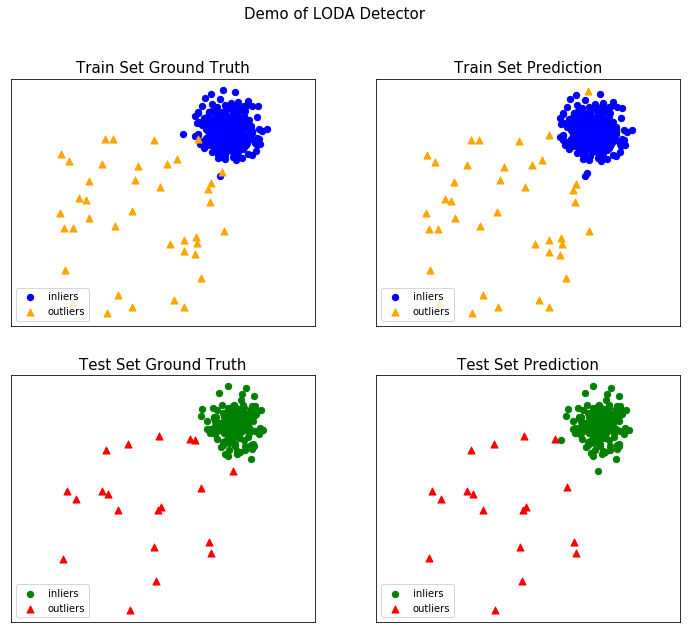

For LODA Algorithm:

On Training Data:
Average ROC:0.9984, Average precision @ rank n:0.9687

On Test Data:
Average ROC:0.9947, Average precision @ rank n:0.9777


Training in PCA For Outlier Detection:


abalone_benchmark_0001.csv has begun!! abalone_benchmark_0002.csv has begun!! abalone_benchmark_0003.csv has begun!! abalone_benchmark_0004.csv has begun!! abalone_benchmark_0005.csv has begun!! abalone_benchmark_0006.csv has begun!! abalone_benchmark_0007.csv has begun!! abalone_benchmark_0008.csv has begun!! abalone_benchmark_0009.csv has begun!! abalone_benchmark_0010.csv has begun!! abalone_benchmark_0011.csv has begun!! abalone_benchmark_0012.csv has begun!! abalone_benchmark_0013.csv has begun!! abalone_benchmark_0014.csv has begun!! abalone_benchmark_0015.csv has begun!! abalone_benchmark_0016.csv has begun!! abalone_benchmark_0017.csv has begun!! abalone_benchmark_0018.csv has begun!! abalone_benchmark_0019.csv has begun!! abalone_benchmark_0020.csv has begun!! abalone_benchmark_0021.csv has begun!! abalone_benchmark_0022.csv has begun!! abalone_benchmark_0023.csv has begun!! abalone_benchmark_0024.csv has begun!! abalone_benchmark_0025.csv has begun!! abalone_benchmark_0026.cs

abalone_benchmark_0715.csv has begun!! abalone_benchmark_0716.csv has begun!! abalone_benchmark_0717.csv has begun!! abalone_benchmark_0718.csv has begun!! abalone_benchmark_0719.csv has begun!! abalone_benchmark_0720.csv has begun!! abalone_benchmark_0721.csv has begun!! abalone_benchmark_0722.csv has begun!! abalone_benchmark_0723.csv has begun!! abalone_benchmark_0724.csv has begun!! abalone_benchmark_0725.csv has begun!! abalone_benchmark_0731.csv has begun!! abalone_benchmark_0732.csv has begun!! abalone_benchmark_0733.csv has begun!! abalone_benchmark_0734.csv has begun!! abalone_benchmark_0735.csv has begun!! abalone_benchmark_0736.csv has begun!! abalone_benchmark_0737.csv has begun!! abalone_benchmark_0738.csv has begun!! abalone_benchmark_0739.csv has begun!! abalone_benchmark_0740.csv has begun!! abalone_benchmark_0741.csv has begun!! abalone_benchmark_0742.csv has begun!! abalone_benchmark_0743.csv has begun!! abalone_benchmark_0744.csv has begun!! abalone_benchmark_0745.cs

abalone_benchmark_0936.csv has begun!! abalone_benchmark_0937.csv has begun!! abalone_benchmark_0938.csv has begun!! abalone_benchmark_0939.csv has begun!! abalone_benchmark_0940.csv has begun!! abalone_benchmark_0941.csv has begun!! abalone_benchmark_0942.csv has begun!! abalone_benchmark_0943.csv has begun!! abalone_benchmark_0944.csv has begun!! abalone_benchmark_0945.csv has begun!! abalone_benchmark_0946.csv has begun!! abalone_benchmark_0947.csv has begun!! abalone_benchmark_0948.csv has begun!! abalone_benchmark_0949.csv has begun!! abalone_benchmark_0950.csv has begun!! abalone_benchmark_0951.csv has begun!! abalone_benchmark_0952.csv has begun!! abalone_benchmark_0953.csv has begun!! abalone_benchmark_0954.csv has begun!! abalone_benchmark_0955.csv has begun!! abalone_benchmark_0956.csv has begun!! abalone_benchmark_0957.csv has begun!! abalone_benchmark_0958.csv has begun!! abalone_benchmark_0959.csv has begun!! abalone_benchmark_0960.csv has begun!! abalone_benchmark_0961.cs

abalone_benchmark_1160.csv has begun!! abalone_benchmark_1161.csv has begun!! abalone_benchmark_1162.csv has begun!! abalone_benchmark_1163.csv has begun!! abalone_benchmark_1164.csv has begun!! abalone_benchmark_1165.csv has begun!! abalone_benchmark_1166.csv has begun!! abalone_benchmark_1167.csv has begun!! abalone_benchmark_1168.csv has begun!! abalone_benchmark_1169.csv has begun!! abalone_benchmark_1170.csv has begun!! abalone_benchmark_1171.csv has begun!! abalone_benchmark_1172.csv has begun!! abalone_benchmark_1173.csv has begun!! abalone_benchmark_1174.csv has begun!! abalone_benchmark_1175.csv has begun!! abalone_benchmark_1176.csv has begun!! abalone_benchmark_1177.csv has begun!! abalone_benchmark_1178.csv has begun!! abalone_benchmark_1179.csv has begun!! abalone_benchmark_1180.csv has begun!! abalone_benchmark_1181.csv has begun!! abalone_benchmark_1182.csv has begun!! abalone_benchmark_1183.csv has begun!! abalone_benchmark_1184.csv has begun!! abalone_benchmark_1185.cs

abalone_benchmark_1377.csv has begun!! abalone_benchmark_1378.csv has begun!! abalone_benchmark_1379.csv has begun!! abalone_benchmark_1380.csv has begun!! abalone_benchmark_1381.csv has begun!! abalone_benchmark_1382.csv has begun!! abalone_benchmark_1383.csv has begun!! abalone_benchmark_1384.csv has begun!! abalone_benchmark_1385.csv has begun!! abalone_benchmark_1386.csv has begun!! abalone_benchmark_1387.csv has begun!! abalone_benchmark_1388.csv has begun!! abalone_benchmark_1389.csv has begun!! abalone_benchmark_1390.csv has begun!! abalone_benchmark_1391.csv has begun!! abalone_benchmark_1392.csv has begun!! abalone_benchmark_1393.csv has begun!! abalone_benchmark_1394.csv has begun!! abalone_benchmark_1395.csv has begun!! abalone_benchmark_1396.csv has begun!! abalone_benchmark_1397.csv has begun!! abalone_benchmark_1398.csv has begun!! abalone_benchmark_1399.csv has begun!! abalone_benchmark_1400.csv has begun!! abalone_benchmark_1401.csv has begun!! abalone_benchmark_1402.cs

abalone_benchmark_1595.csv has begun!! abalone_benchmark_1596.csv has begun!! abalone_benchmark_1597.csv has begun!! abalone_benchmark_1598.csv has begun!! abalone_benchmark_1599.csv has begun!! abalone_benchmark_1600.csv has begun!! abalone_benchmark_1601.csv has begun!! abalone_benchmark_1602.csv has begun!! abalone_benchmark_1603.csv has begun!! abalone_benchmark_1604.csv has begun!! abalone_benchmark_1605.csv has begun!! abalone_benchmark_1606.csv has begun!! abalone_benchmark_1607.csv has begun!! abalone_benchmark_1608.csv has begun!! abalone_benchmark_1609.csv has begun!! abalone_benchmark_1610.csv has begun!! abalone_benchmark_1611.csv has begun!! abalone_benchmark_1612.csv has begun!! abalone_benchmark_1613.csv has begun!! abalone_benchmark_1614.csv has begun!! abalone_benchmark_1615.csv has begun!! abalone_benchmark_1616.csv has begun!! abalone_benchmark_1617.csv has begun!! abalone_benchmark_1618.csv has begun!! abalone_benchmark_1619.csv has begun!! abalone_benchmark_1620.cs

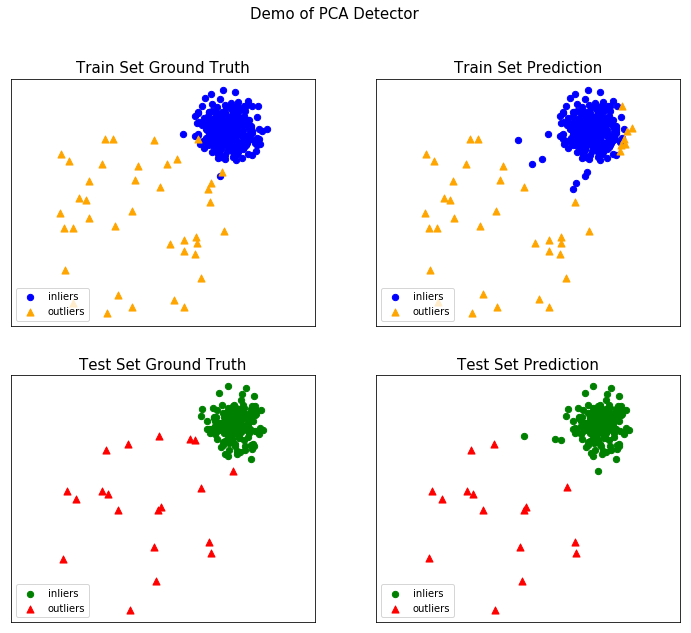

For PCA Algorithm:

On Training Data:
Average ROC:0.9519, Average precision @ rank n:0.825

On Test Data:
Average ROC:0.9047, Average precision @ rank n:0.85


Training in COF For Outlier Detection:


abalone_benchmark_0001.csv has begun!! abalone_benchmark_0002.csv has begun!! abalone_benchmark_0003.csv has begun!! abalone_benchmark_0004.csv has begun!! abalone_benchmark_0005.csv has begun!! abalone_benchmark_0006.csv has begun!! abalone_benchmark_0007.csv has begun!! abalone_benchmark_0008.csv has begun!! abalone_benchmark_0009.csv has begun!! abalone_benchmark_0010.csv has begun!! abalone_benchmark_0011.csv has begun!! abalone_benchmark_0012.csv has begun!! abalone_benchmark_0013.csv has begun!! abalone_benchmark_0014.csv has begun!! abalone_benchmark_0015.csv has begun!! abalone_benchmark_0016.csv has begun!! abalone_benchmark_0017.csv has begun!! abalone_benchmark_0018.csv has begun!! abalone_benchmark_0019.csv has begun!! abalone_benchmark_0020.csv has begun!! abalone_benchmark_0021.csv has begun!! abalone_benchmark_0022.csv has begun!! abalone_benchmark_0023.csv has begun!! abalone_benchmark_0024.csv has begun!! abalone_benchmark_0025.csv has begun!! abalone_benchmark_0026.cs

abalone_benchmark_0699.csv has begun!! abalone_benchmark_0700.csv has begun!! abalone_benchmark_0701.csv has begun!! abalone_benchmark_0702.csv has begun!! abalone_benchmark_0703.csv has begun!! abalone_benchmark_0704.csv has begun!! abalone_benchmark_0705.csv has begun!! abalone_benchmark_0706.csv has begun!! abalone_benchmark_0707.csv has begun!! abalone_benchmark_0708.csv has begun!! abalone_benchmark_0709.csv has begun!! abalone_benchmark_0710.csv has begun!! abalone_benchmark_0711.csv has begun!! abalone_benchmark_0712.csv has begun!! abalone_benchmark_0713.csv has begun!! abalone_benchmark_0714.csv has begun!! abalone_benchmark_0715.csv has begun!! abalone_benchmark_0716.csv has begun!! abalone_benchmark_0717.csv has begun!! abalone_benchmark_0718.csv has begun!! abalone_benchmark_0719.csv has begun!! abalone_benchmark_0720.csv has begun!! abalone_benchmark_0721.csv has begun!! abalone_benchmark_0722.csv has begun!! abalone_benchmark_0723.csv has begun!! abalone_benchmark_0724.cs

abalone_benchmark_0915.csv has begun!! abalone_benchmark_0916.csv has begun!! abalone_benchmark_0917.csv has begun!! abalone_benchmark_0918.csv has begun!! abalone_benchmark_0919.csv has begun!! abalone_benchmark_0920.csv has begun!! abalone_benchmark_0921.csv has begun!! abalone_benchmark_0922.csv has begun!! abalone_benchmark_0923.csv has begun!! abalone_benchmark_0924.csv has begun!! abalone_benchmark_0925.csv has begun!! abalone_benchmark_0926.csv has begun!! abalone_benchmark_0927.csv has begun!! abalone_benchmark_0928.csv has begun!! abalone_benchmark_0929.csv has begun!! abalone_benchmark_0930.csv has begun!! abalone_benchmark_0931.csv has begun!! abalone_benchmark_0932.csv has begun!! abalone_benchmark_0933.csv has begun!! abalone_benchmark_0934.csv has begun!! abalone_benchmark_0935.csv has begun!! abalone_benchmark_0936.csv has begun!! abalone_benchmark_0937.csv has begun!! abalone_benchmark_0938.csv has begun!! abalone_benchmark_0939.csv has begun!! abalone_benchmark_0940.cs

abalone_benchmark_1126.csv has begun!! abalone_benchmark_1127.csv has begun!! abalone_benchmark_1128.csv has begun!! abalone_benchmark_1129.csv has begun!! abalone_benchmark_1130.csv has begun!! abalone_benchmark_1136.csv has begun!! abalone_benchmark_1137.csv has begun!! abalone_benchmark_1138.csv has begun!! abalone_benchmark_1139.csv has begun!! abalone_benchmark_1140.csv has begun!! abalone_benchmark_1141.csv has begun!! abalone_benchmark_1142.csv has begun!! abalone_benchmark_1143.csv has begun!! abalone_benchmark_1144.csv has begun!! abalone_benchmark_1145.csv has begun!! abalone_benchmark_1146.csv has begun!! abalone_benchmark_1147.csv has begun!! abalone_benchmark_1148.csv has begun!! abalone_benchmark_1149.csv has begun!! abalone_benchmark_1150.csv has begun!! abalone_benchmark_1151.csv has begun!! abalone_benchmark_1152.csv has begun!! abalone_benchmark_1153.csv has begun!! abalone_benchmark_1154.csv has begun!! abalone_benchmark_1155.csv has begun!! abalone_benchmark_1156.cs

abalone_benchmark_1342.csv has begun!! abalone_benchmark_1343.csv has begun!! abalone_benchmark_1344.csv has begun!! abalone_benchmark_1345.csv has begun!! abalone_benchmark_1346.csv has begun!! abalone_benchmark_1347.csv has begun!! abalone_benchmark_1348.csv has begun!! abalone_benchmark_1349.csv has begun!! abalone_benchmark_1350.csv has begun!! abalone_benchmark_1351.csv has begun!! abalone_benchmark_1352.csv has begun!! abalone_benchmark_1353.csv has begun!! abalone_benchmark_1354.csv has begun!! abalone_benchmark_1355.csv has begun!! abalone_benchmark_1356.csv has begun!! abalone_benchmark_1357.csv has begun!! abalone_benchmark_1358.csv has begun!! abalone_benchmark_1359.csv has begun!! abalone_benchmark_1360.csv has begun!! abalone_benchmark_1361.csv has begun!! abalone_benchmark_1362.csv has begun!! abalone_benchmark_1363.csv has begun!! abalone_benchmark_1364.csv has begun!! abalone_benchmark_1365.csv has begun!! abalone_benchmark_1366.csv has begun!! abalone_benchmark_1367.cs

abalone_benchmark_1553.csv has begun!! abalone_benchmark_1554.csv has begun!! abalone_benchmark_1555.csv has begun!! abalone_benchmark_1556.csv has begun!! abalone_benchmark_1557.csv has begun!! abalone_benchmark_1558.csv has begun!! abalone_benchmark_1559.csv has begun!! abalone_benchmark_1560.csv has begun!! abalone_benchmark_1561.csv has begun!! abalone_benchmark_1562.csv has begun!! abalone_benchmark_1563.csv has begun!! abalone_benchmark_1564.csv has begun!! abalone_benchmark_1565.csv has begun!! abalone_benchmark_1566.csv has begun!! abalone_benchmark_1567.csv has begun!! abalone_benchmark_1568.csv has begun!! abalone_benchmark_1569.csv has begun!! abalone_benchmark_1570.csv has begun!! abalone_benchmark_1571.csv has begun!! abalone_benchmark_1572.csv has begun!! abalone_benchmark_1573.csv has begun!! abalone_benchmark_1574.csv has begun!! abalone_benchmark_1575.csv has begun!! abalone_benchmark_1576.csv has begun!! abalone_benchmark_1577.csv has begun!! abalone_benchmark_1578.cs

abalone_benchmark_1764.csv has begun!! abalone_benchmark_1765.csv has begun!! abalone_benchmark_1766.csv has begun!! abalone_benchmark_1767.csv has begun!! abalone_benchmark_1768.csv has begun!! abalone_benchmark_1769.csv has begun!! abalone_benchmark_1770.csv has begun!! abalone_benchmark_1771.csv has begun!! abalone_benchmark_1772.csv has begun!! abalone_benchmark_1773.csv has begun!! abalone_benchmark_1774.csv has begun!! abalone_benchmark_1775.csv has begun!! abalone_benchmark_1776.csv has begun!! abalone_benchmark_1777.csv has begun!! abalone_benchmark_1778.csv has begun!! abalone_benchmark_1779.csv has begun!! abalone_benchmark_1780.csv has begun!! abalone_benchmark_1781.csv has begun!! abalone_benchmark_1782.csv has begun!! abalone_benchmark_1783.csv has begun!! abalone_benchmark_1784.csv has begun!! abalone_benchmark_1785.csv has begun!! abalone_benchmark_1786.csv has begun!! abalone_benchmark_1787.csv has begun!! abalone_benchmark_1788.csv has begun!! abalone_benchmark_1789.cs

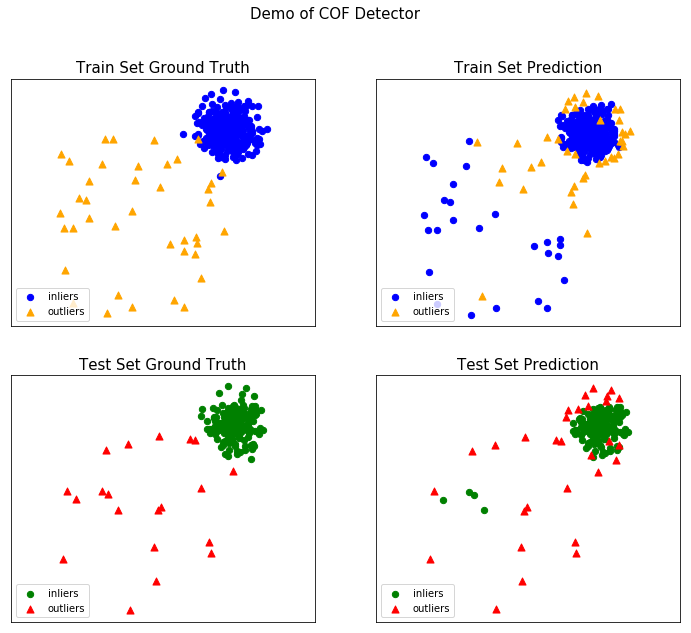

For COF Algorithm:

On Training Data:
Average ROC:0.702, Average precision @ rank n:0.325

On Test Data:
Average ROC:0.9511, Average precision @ rank n:0.7


Training in HBOS For Outlier Detection:


abalone_benchmark_0001.csv has begun!! abalone_benchmark_0002.csv has begun!! abalone_benchmark_0003.csv has begun!! abalone_benchmark_0004.csv has begun!! abalone_benchmark_0005.csv has begun!! abalone_benchmark_0006.csv has begun!! abalone_benchmark_0007.csv has begun!! abalone_benchmark_0008.csv has begun!! abalone_benchmark_0009.csv has begun!! abalone_benchmark_0010.csv has begun!! abalone_benchmark_0011.csv has begun!! abalone_benchmark_0012.csv has begun!! abalone_benchmark_0013.csv has begun!! abalone_benchmark_0014.csv has begun!! abalone_benchmark_0015.csv has begun!! abalone_benchmark_0016.csv has begun!! abalone_benchmark_0017.csv has begun!! abalone_benchmark_0018.csv has begun!! abalone_benchmark_0019.csv has begun!! abalone_benchmark_0020.csv has begun!! abalone_benchmark_0021.csv has begun!! abalone_benchmark_0022.csv has begun!! abalone_benchmark_0023.csv has begun!! abalone_benchmark_0024.csv has begun!! abalone_benchmark_0025.csv has begun!! abalone_benchmark_0026.cs

abalone_benchmark_0703.csv has begun!! abalone_benchmark_0704.csv has begun!! abalone_benchmark_0705.csv has begun!! abalone_benchmark_0706.csv has begun!! abalone_benchmark_0707.csv has begun!! abalone_benchmark_0708.csv has begun!! abalone_benchmark_0709.csv has begun!! abalone_benchmark_0710.csv has begun!! abalone_benchmark_0711.csv has begun!! abalone_benchmark_0712.csv has begun!! abalone_benchmark_0713.csv has begun!! abalone_benchmark_0714.csv has begun!! abalone_benchmark_0715.csv has begun!! abalone_benchmark_0716.csv has begun!! abalone_benchmark_0717.csv has begun!! abalone_benchmark_0718.csv has begun!! abalone_benchmark_0719.csv has begun!! abalone_benchmark_0720.csv has begun!! abalone_benchmark_0721.csv has begun!! abalone_benchmark_0722.csv has begun!! abalone_benchmark_0723.csv has begun!! abalone_benchmark_0724.csv has begun!! abalone_benchmark_0725.csv has begun!! abalone_benchmark_0731.csv has begun!! abalone_benchmark_0732.csv has begun!! abalone_benchmark_0733.cs

abalone_benchmark_0920.csv has begun!! abalone_benchmark_0921.csv has begun!! abalone_benchmark_0922.csv has begun!! abalone_benchmark_0923.csv has begun!! abalone_benchmark_0924.csv has begun!! abalone_benchmark_0925.csv has begun!! abalone_benchmark_0926.csv has begun!! abalone_benchmark_0927.csv has begun!! abalone_benchmark_0928.csv has begun!! abalone_benchmark_0929.csv has begun!! abalone_benchmark_0930.csv has begun!! abalone_benchmark_0931.csv has begun!! abalone_benchmark_0932.csv has begun!! abalone_benchmark_0933.csv has begun!! abalone_benchmark_0934.csv has begun!! abalone_benchmark_0935.csv has begun!! abalone_benchmark_0936.csv has begun!! abalone_benchmark_0937.csv has begun!! abalone_benchmark_0938.csv has begun!! abalone_benchmark_0939.csv has begun!! abalone_benchmark_0940.csv has begun!! abalone_benchmark_0941.csv has begun!! abalone_benchmark_0942.csv has begun!! abalone_benchmark_0943.csv has begun!! abalone_benchmark_0944.csv has begun!! abalone_benchmark_0945.cs

abalone_benchmark_1138.csv has begun!! abalone_benchmark_1139.csv has begun!! abalone_benchmark_1140.csv has begun!! abalone_benchmark_1141.csv has begun!! abalone_benchmark_1142.csv has begun!! abalone_benchmark_1143.csv has begun!! abalone_benchmark_1144.csv has begun!! abalone_benchmark_1145.csv has begun!! abalone_benchmark_1146.csv has begun!! abalone_benchmark_1147.csv has begun!! abalone_benchmark_1148.csv has begun!! abalone_benchmark_1149.csv has begun!! abalone_benchmark_1150.csv has begun!! abalone_benchmark_1151.csv has begun!! abalone_benchmark_1152.csv has begun!! abalone_benchmark_1153.csv has begun!! abalone_benchmark_1154.csv has begun!! abalone_benchmark_1155.csv has begun!! abalone_benchmark_1156.csv has begun!! abalone_benchmark_1157.csv has begun!! abalone_benchmark_1158.csv has begun!! abalone_benchmark_1159.csv has begun!! abalone_benchmark_1160.csv has begun!! abalone_benchmark_1161.csv has begun!! abalone_benchmark_1162.csv has begun!! abalone_benchmark_1163.cs

abalone_benchmark_1356.csv has begun!! abalone_benchmark_1357.csv has begun!! abalone_benchmark_1358.csv has begun!! abalone_benchmark_1359.csv has begun!! abalone_benchmark_1360.csv has begun!! abalone_benchmark_1361.csv has begun!! abalone_benchmark_1362.csv has begun!! abalone_benchmark_1363.csv has begun!! abalone_benchmark_1364.csv has begun!! abalone_benchmark_1365.csv has begun!! abalone_benchmark_1366.csv has begun!! abalone_benchmark_1367.csv has begun!! abalone_benchmark_1368.csv has begun!! abalone_benchmark_1369.csv has begun!! abalone_benchmark_1370.csv has begun!! abalone_benchmark_1371.csv has begun!! abalone_benchmark_1372.csv has begun!! abalone_benchmark_1373.csv has begun!! abalone_benchmark_1374.csv has begun!! abalone_benchmark_1375.csv has begun!! abalone_benchmark_1376.csv has begun!! abalone_benchmark_1377.csv has begun!! abalone_benchmark_1378.csv has begun!! abalone_benchmark_1379.csv has begun!! abalone_benchmark_1380.csv has begun!! abalone_benchmark_1381.cs

abalone_benchmark_1576.csv has begun!! abalone_benchmark_1577.csv has begun!! abalone_benchmark_1578.csv has begun!! abalone_benchmark_1579.csv has begun!! abalone_benchmark_1580.csv has begun!! abalone_benchmark_1581.csv has begun!! abalone_benchmark_1582.csv has begun!! abalone_benchmark_1583.csv has begun!! abalone_benchmark_1584.csv has begun!! abalone_benchmark_1585.csv has begun!! abalone_benchmark_1586.csv has begun!! abalone_benchmark_1587.csv has begun!! abalone_benchmark_1588.csv has begun!! abalone_benchmark_1589.csv has begun!! abalone_benchmark_1590.csv has begun!! abalone_benchmark_1591.csv has begun!! abalone_benchmark_1592.csv has begun!! abalone_benchmark_1593.csv has begun!! abalone_benchmark_1594.csv has begun!! abalone_benchmark_1595.csv has begun!! abalone_benchmark_1596.csv has begun!! abalone_benchmark_1597.csv has begun!! abalone_benchmark_1598.csv has begun!! abalone_benchmark_1599.csv has begun!! abalone_benchmark_1600.csv has begun!! abalone_benchmark_1601.cs

abalone_benchmark_1794.csv has begun!! abalone_benchmark_1795.csv has begun!! abalone_benchmark_1796.csv has begun!! abalone_benchmark_1797.csv has begun!! abalone_benchmark_1798.csv has begun!! abalone_benchmark_1799.csv has begun!! abalone_benchmark_1800.csv has begun!! 

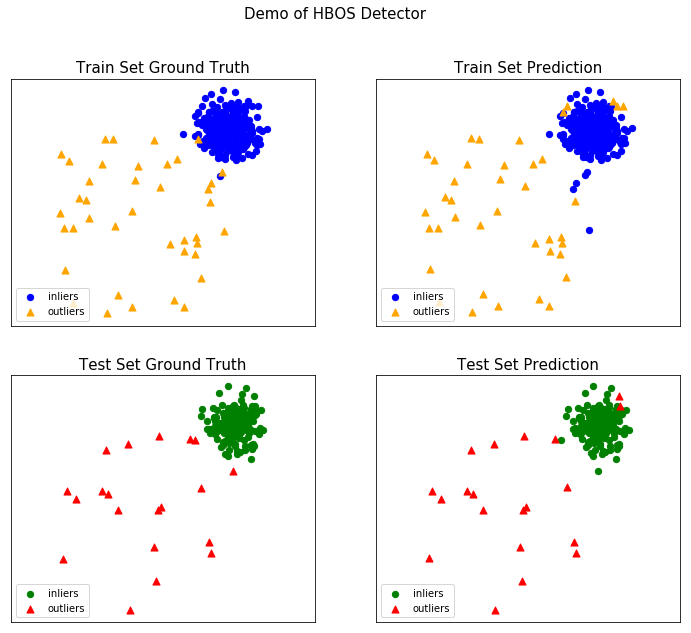

For HBOS Algorithm:

On Training Data:
Average ROC:0.9958, Average precision @ rank n:0.875

On Test Data:
Average ROC:0.9943, Average precision @ rank n:0.9




In [9]:
for algorithm in models:
    print('Training in '+algorithm+' For Outlier Detection:')
    roc_train=[]
    prn_train=[]
    roc_test=[]
    prn_test=[]
    for file in file_directory_abalone:
        print(file+' has begun!! ',end='')
        if file=='abalone_benchmark_1800.csv':
            filename=path_abalone+file
            eval_train,eval_test=OutlierDetection_abalone(filename,algorithm,visual=True)
        else:    
            filename=path_abalone+file
            eval_train,eval_test=OutlierDetection_abalone(filename,algorithm)
      
            
        roc_train.append(eval_train[0])
        prn_train.append(eval_train[1])
        roc_test.append(eval_test[0])
        prn_test.append(eval_test[1])
    
    roc_train=np.array(roc_train)
    prn_train=np.array(prn_train)
    roc_test=np.array(roc_test)
    prn_test=np.array(prn_test)
    
    print('For '+algorithm+' Algorithm:')
    print("\nOn Training Data:")
    print('Average ROC:{:.4}, Average precision @ rank n:{:.4}'.format(roc_train.mean(),prn_train.mean()) )
    print("\nOn Test Data:")
    print('Average ROC:{:.4}, Average precision @ rank n:{:.4}'.format(roc_test.mean(),prn_test.mean()) )
    print('=======================================================================================================')
    print('\n')

由上述运行结果可知，在abalone数据集上，异常点检测指标如下：

对于KNN算法， 在训练集上的 avg ROC=0.9952 , avg prn=0.95;在测试集上的 avg ROC=1.0 , avg prn=1.0。

对于LODA算法，在训练集上的 avg ROC=0.9984 , avg prn=0.9687;在测试集上的 avg ROC=0.9947 , avg prn=0.9777。

对于PCA算法， 在训练集上的 avg ROC=0.9519 , avg prn=0.825;在测试集上的 avg ROC=0.9047 , avg prn=0.85。

对于COF算法， 在训练集上的 avg ROC=0.702 , avg prn=0.325;在测试集上的 avg ROC=0.9511 , avg prn=0.7。

对于HBOS算法，在训练集上的 avg ROC=0.9958 , avg prn=0.875;在测试集上的 avg ROC=0.9943 , avg prn=0.9。

ps:由于数据量过大，仅将abalone数据集的最后一个benchmark在不同的算法上对异常点检测的结果进行可视化展示。